In [3]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np

In [4]:
# Leemos y cargamos los datos
df2 = pd.read_csv("/content/sample_data/Ejemplo_Análisis preliminar.csv",sep=";",encoding='latin-1')

In [5]:
# Conocemos las clases de las variables del dataset
df2.dtypes

CET                             object
Max TemperatureC               float64
Mean TemperatureC              float64
Min TemperatureC               float64
Max Humidity                   float64
 Mean Humidity                 float64
 Min Humidity                  float64
 Max Sea Level PressurehPa       int64
 Mean Sea Level PressurehPa      int64
 Min Sea Level PressurehPa       int64
 Max Wind SpeedKm/h              int64
 Mean Wind SpeedKm/h             int64
Precipitationmm                float64
 Events                         object
WindDirDegrees                   int64
dtype: object

In [6]:
# Realizamos un pequeño resumen estadistico de los datos para conocerlos mejor
df2.describe()
descripcion = df2.describe()

In [7]:
# Si quisieramos analizar una variable en concreto
df2['Max TemperatureC'].describe()


count    6808.000000
mean       21.039806
std         8.867785
min         0.000000
25%        13.000000
50%        20.000000
75%        29.000000
max        41.000000
Name: Max TemperatureC, dtype: float64

In [8]:
# También podemos hacer un pequeño bucle y mostrar en la consola el resumen de cada variable
for i in df2:
    print(i)
    print(df2[i].describe())

CET
count           6812
unique          6812
top       01/01/1997
freq               1
Name: CET, dtype: object
Max TemperatureC
count    6808.000000
mean       21.039806
std         8.867785
min         0.000000
25%        13.000000
50%        20.000000
75%        29.000000
max        41.000000
Name: Max TemperatureC, dtype: float64
Mean TemperatureC
count    6806.000000
mean       14.657949
std         7.579699
min        -3.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        32.000000
Name: Mean TemperatureC, dtype: float64
Min TemperatureC
count    6808.000000
mean        8.642186
std         6.837860
min       -10.000000
25%         3.000000
50%         9.000000
75%        14.000000
max        28.000000
Name: Min TemperatureC, dtype: float64
Max Humidity
count    6808.000000
mean       81.134841
std        17.532334
min        16.000000
25%        68.000000
50%        87.000000
75%        94.000000
max       100.000000
Name: Max Humidity, dtype: float

In [9]:
# Los nombres de algunas de las variables tiene un espacio intercalado,
# convendria eliminarlo para evitar problemas a la hora de llamar a estas columnas
df2.columns
df2.columns = df2.columns.str.replace(' ','')

In [10]:
# Si analizamos la variable Events, podemos ver que tenemos valores NAN.
# No son valores perdidos, en este caso siginifica que ese da no hubo ningún evento climatológico
# Por lo tanto, cambiamos el NAN por "No_evento"
eventos_unicos = df2['Events'].unique()
df2['Events'] = df2['Events'].fillna('No_Evento')
df2['Events'].unique()

array(['No_Evento', 'Rain', 'Rain-Snow', 'Snow', 'Fog', 'Fog-Rain',
       'Rain-Thunderstorm', 'Thunderstorm', 'Rain-Hail-Thunderstorm',
       'Fog-Thunderstorm', 'Tornado', 'Fog-Rain-Thunderstorm',
       'Fog-Rain-Snow', 'Fog-Snow', 'Rain-Snow-Thunderstorm', 'Rain-Hail'],
      dtype=object)

In [11]:
# Otro error que se puede observar es que la fecha la toma como object
# Debemos convertirla a tipo fecha
df2.dtypes
df2['CET1'] = pd.to_datetime(df2['CET'])
df2['CET'] = pd.to_datetime(df2['CET'], format='%d/%m/%Y')

<ipython-input-11-dab0c6003799>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['CET1'] = pd.to_datetime(df2['CET'])


<Axes: >

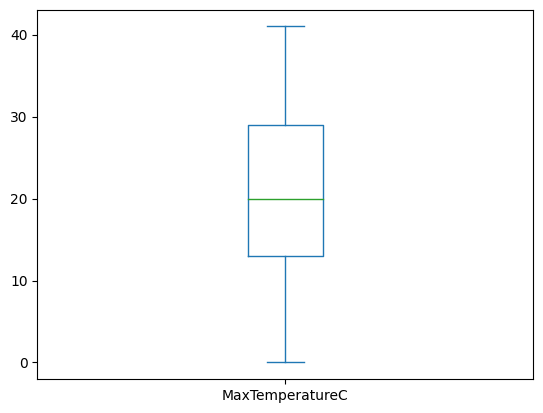

In [12]:
# Análisis preliminar de los datos: GRÁFICOS
# Realizaremos un pequeño análisis grafico.
# Podemos obtener alguna información relevante o no.
# Esto sirve para tener una primera idea de las variables.

# Análisis centrado en la TEMPERATURA MÁXIMA:

# Boxplot
df2['MaxTemperatureC'].plot(kind='box')

<Axes: xlabel='Events', ylabel='MaxTemperatureC'>

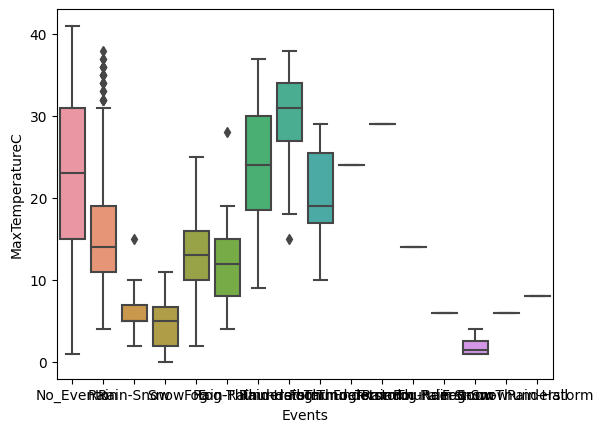

In [13]:
# Temperatura max en función de los eventos: diagrama de cajas
import seaborn as sns
sns.boxplot(x=df2['Events'], y=df2['MaxTemperatureC'])

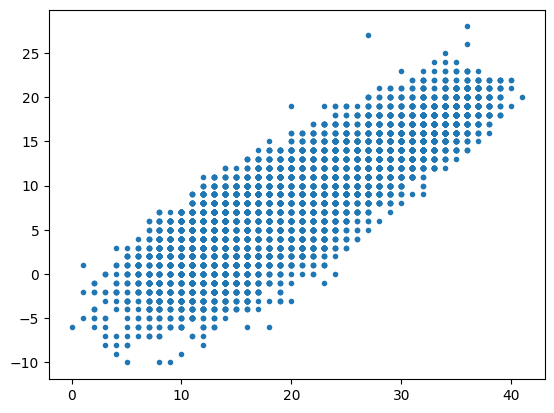

In [14]:
# Relació entre la temperatura máxima y mínima
import matplotlib.pyplot as plt
plt.plot(df2['MaxTemperatureC'],df2['MinTemperatureC'],'.')

array([[<Axes: title={'center': 'MaxTemperatureC'}>]], dtype=object)

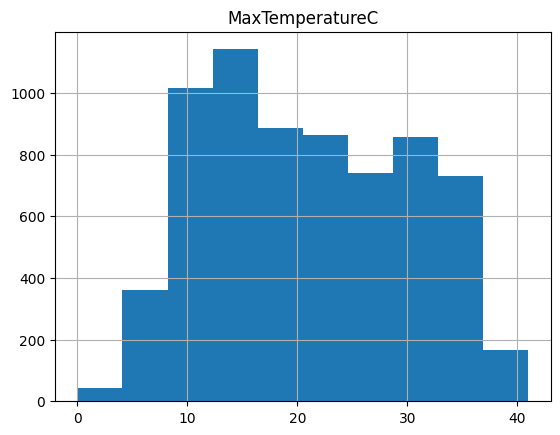

In [15]:
# Histograma
df2.hist(column='MaxTemperatureC')

<Axes: title={'center': 'Distribucion de la Temperatura'}>

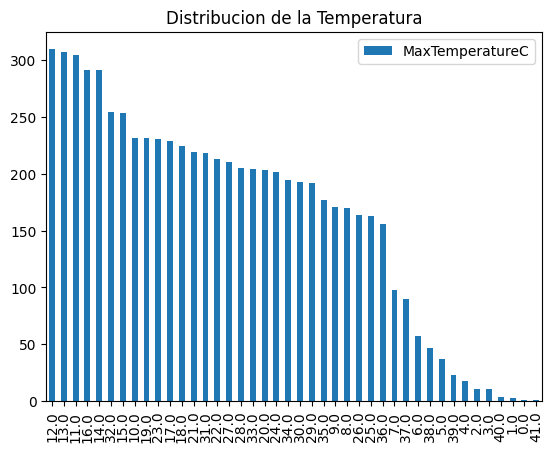

In [16]:
# Gráfico de barras
df2['MaxTemperatureC'].value_counts().plot(x='Temp Max',y='frecuencia',
                                           kind='bar', legend=True,title='Distribucion de la Temperatura')


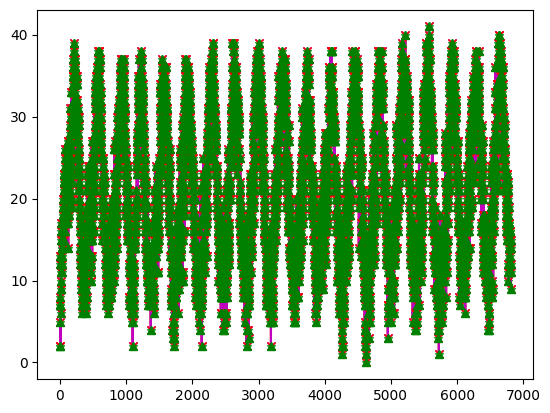

In [17]:
# Distribución
plt.plot(df2['MaxTemperatureC'],'.')
plt.plot(df2['MaxTemperatureC'],'-')
plt.plot(df2['MaxTemperatureC'],'*')
plt.plot(df2['MaxTemperatureC'],'m')
plt.plot(df2['MaxTemperatureC'],'x')
plt.plot(df2['MaxTemperatureC'],'xm')
plt.plot(df2['MaxTemperatureC'],'xr')
plt.plot(df2['MaxTemperatureC'],'^g')

In [18]:
# Otros gráficos interesantes


# 1.CORRELACIONES entre variables:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-19-5ca02060eb9c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df2.corr())


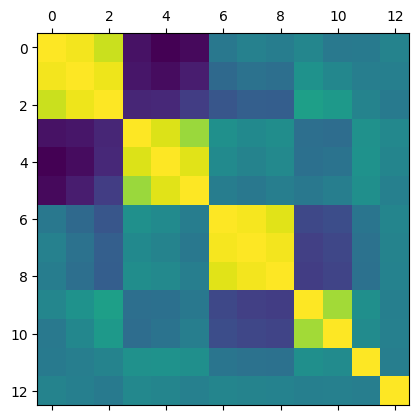

In [19]:
# 1.1 COLORES
plt.matshow(df2.corr())

<ipython-input-20-2e8dc10118f4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()
<ipython-input-20-2e8dc10118f4>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


<Axes: >

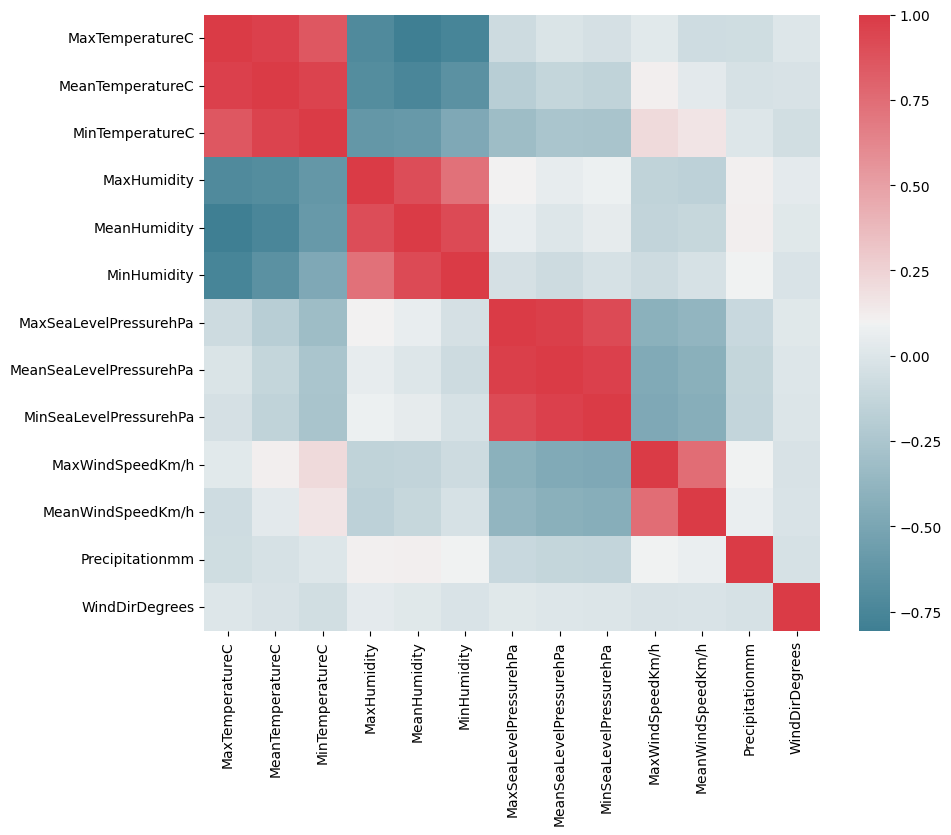

In [20]:
# 1.2 COLORES
# Hay que ejecutarlo todo a la vez.
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [ ]:
# 2. DIAGRAMA DE DISPERSIÓN
# Este no admite NAs
import seaborn as sns
datoscomp=df2.dropna()
sns.pairplot(datoscomp)